In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("./data2/Train.csv")
test_data = pd.read_csv("./data2/Test.csv")
train_data = train_data.values
test_data = test_data.values

x_train = train_data[:, :5]
y_train = train_data[:, 5]
print(x_train.shape, y_train.shape)

x_test = test_data
print(x_test.shape)

(1600, 5) (1600,)
(400, 5)


In [10]:
def hypothesis(theta, x_train):
    y = theta[0] + (theta[1]*x_train[0]) + (theta[2]*x_train[1]) + (theta[3]*x_train[2]) + (theta[4]*x_train[3]) + (theta[5]*x_train[4])
    return y

def gradient(x_train, y_train, theta):
    gradient = np.zeros((5,))
    gradient_not = np.array([0.0])
    m = x_train.shape[0]
    for i in range(m):
        gradient_not[0] = gradient_not[0] + (hypothesis(theta, x_train[i]) - y_train[i])
        for j in range(5):
            gradient[j] = gradient[j] + ((hypothesis(theta, x_train[i]) - y_train[i])*x_train[i][j])
    return np.append(gradient_not, gradient)

def mini_batch_gradient_descent(x_train, y_train, theta, batch_size = 5):
    m = x_train.shape[0]
    ind = np.arange(m)
    np.random.shuffle(ind)
    indices = ind[:batch_size]
    gradient = np.zeros((5,))
    gradient_not = np.array([0.0])
    for i in indices:
        gradient_not[0] = gradient_not[0] + (hypothesis(theta, x_train[i]) - y_train[i])
        for j in range(5):
            gradient[j] = gradient[j] + ((hypothesis(theta, x_train[i]) - y_train[i])*x_train[i][j])
    return np.append(gradient_not, gradient)

def mini_batch_gradient_update(x_train, y_train, learning_rate, max_iterations):
    combined_error = []
    theta = np.zeros((6,))
    for i in range(max_iterations):
        err = error(x_train, y_train, theta)
        grad = mini_batch_gradient_descent(x_train, y_train, theta)
        for j in range(6):
            theta[j] = theta[j] - learning_rate*grad[j]
        combined_error.append(err)
    return theta, combined_error

def gradient_update(x_train, y_train, learning_rate, max_iterations):
    combined_error = []
    theta = np.zeros((6,))
    for i in range(max_iterations):
        err = error(x_train, y_train, theta)
        grad = gradient(x_train, y_train, theta)
        for j in range(6):
            theta[j] = theta[j] - learning_rate*grad[j]
        combined_error.append(err)
    return theta, combined_error

def error(x_train, y_train, theta):
    m = x_train.shape[0]
    total_error = 0
    for i in range(m):
        total_error = total_error + ((hypothesis(theta, x_train[i]) - y_train[i])**2)
    return 0.5*total_error

theta, combined_error = gradient_update(x_train, y_train, learning_rate = 0.001, max_iterations = 100)
print("The following are the results when batch gradient descent is used:","\n")
print("Value of parameters are,", theta)
print("Intercept is", theta[0], "and Coefficients are", theta[1:])
print("Minimum value of error achieved in batch gradient descent,", min(combined_error),"\n")

theta1, combined_error1 = mini_batch_gradient_update(x_train, y_train, learning_rate = 0.01, max_iterations = 100)
print("The following are the results obtained from mini batch/stochastic gradient descent:","\n")
print("Value of parameters are,", theta1)
print("Intercept is", theta1[0], "and Coefficients are", theta1[1:])
print("Minimum value of error achieved in mini batch gradient descent,", min(combined_error1),"\n")


The following are the results when batch gradient descent is used: 

Value of parameters are, [ 4.99096674 29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
Intercept is 4.990966735574954 and Coefficients are [29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
Minimum value of error achieved in batch gradient descent, 332442.65243889234 

The following are the results obtained from mini batch/stochastic gradient descent: 

Value of parameters are, [ 4.87893249 27.68893681 94.75418901  7.5990297  43.64227559  1.34977316]
Intercept is 4.878932486848604 and Coefficients are [27.68893681 94.75418901  7.5990297  43.64227559  1.34977316]
Minimum value of error achieved in mini batch gradient descent, 334600.6464687634 



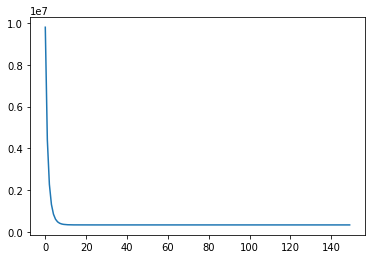

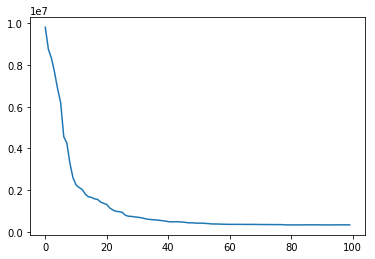

In [8]:
plt.plot(combined_error)
plt.show()

plt.plot(combined_error1)
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept,", lr.intercept_)
print("Coefficients,", lr.coef_)
print("Score on Training set is", lr.score(x_train, y_train))


Intercept, 4.990966735574959
Coefficients, [29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
Score on Training set is 0.9660939669975616


In [9]:
# Evaluating the accuracy of the algorithm by finding the r2 score (coefficient of determination)

from sklearn.metrics import r2_score

y_train_predicted = np.zeros((1600,))
m = x_train.shape[0]
for i in range(m):
    y_train_predicted[i] = hypothesis(theta, x_train[i])
print("r2 score on training set", r2_score(y_train, y_train_predicted), "\n")

y_test_predicted = np.zeros((400,))
m = x_test.shape[0]
for i in range(m):
    y_test_predicted[i] = hypothesis(theta, x_test[i])
#print("predicted y values on testing set", y_test_predicted)

r2 score on training set 0.9660939669975617 



In [19]:
# Dumping the numpy array to csv file to be uploaded to kaggle
pd.DataFrame(y_test_predicted).to_csv("submission.csv")